In [1]:
from hearing_assistive import *
import numpy as np

%matplotlib inline

# Get Wave Segments

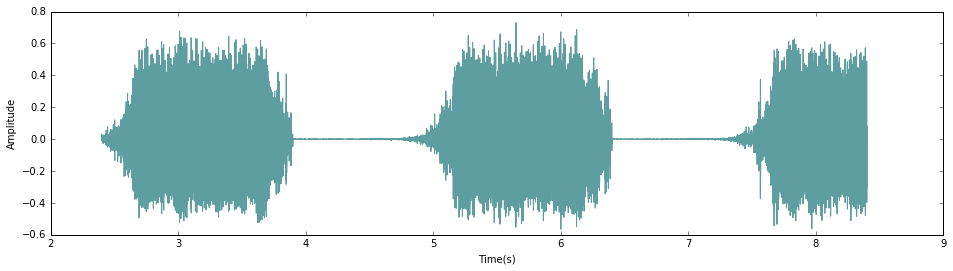

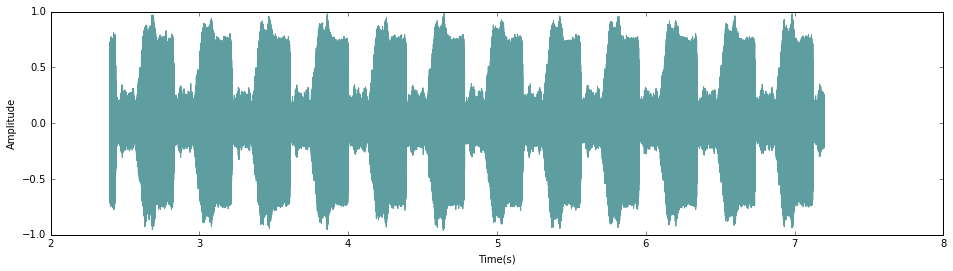

In [2]:
alarm = read_wave('Sounds/school_fire_alarm.wav')
alarm_seg_map = alarm.partition()   # default, 2.4 second segments
alarm_seg = alarm_seg_map[7]
alarm_seg.plot()

tones = read_wave('Sounds/plectron_tones.wav')
tones_seg_map = tones.partition()   # default, 2.4 second segments
tones_seg = tones_seg_map[6]
tones_seg.plot()

In [3]:
alarm_seg.make_audio()

In [4]:
tones_seg.make_audio()

# Create and Train SVM Classifier (may take a while)

In [5]:
clf = init_classifier(True, alarm_seg, tones_seg)

(500, 119, 26)


# Create Test Set and Test Classifier

In [6]:
testset = []
expected = []
size = 2

# add dummy sets of zeros to the testset
for i in range(size):
    dummyset = np.zeros((119, 26))
    testset.append(dummyset)
    expected.append(0)
    
# add dummy sets of ones to the testset
for i in range(size):
    dummyset = np.ones((119, 26))
    testset.append(dummyset)
    expected.append(1)
    
# add dummy sets of negative ones to the testset
for i in range(size):
    dummyset = np.negative(np.ones((119, 26)))
    testset.append(dummyset)
    expected.append(2)
    
# # add alarm sound files to the testset
for i in range(size*4):
    segment = alarm_seg_map[10]
    segment = apply_filter(segment)
#     segment.plot()
    spectrogram = segment.make_spectrogram(seg_length=1764)  # 1764 = 40ms * 44100fps = samples per 40ms
    dummyset = spectrogram.mfcc()   # use default parameter, only include coefficients 2-14 (13 coefficients)
    testset.append(dummyset)
    expected.append(3)
    
# # add tones sound files to the testset
for i in range(size*4):
    segment = tones_seg_map[6]
    segment = apply_filter(segment)
#     segment.plot()
    spectrogram = segment.make_spectrogram(seg_length=1764)  # 1764 = 40ms * 44100fps = samples per 40ms
    dummyset = spectrogram.mfcc()   # use default parameter, only include coefficients 2-14 (13 coefficients)
    testset.append(dummyset)
    expected.append(4)
    
# convert to numpy array
testset = np.asarray(testset)
    
# restructure testset before being processed by svm
testset = testset.reshape((testset.shape[0], -1))
print testset.shape

(22, 3094)


In [7]:
actual = list(clf.predict(testset))
print "extected: \t", expected
print "actual: \t", actual
print clf_accuracy(expected, actual), "%"

extected: 	[0, 0, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4]
actual: 	[0, 0, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 4, 4, 3, 3]
86.3636363636 %
